# 07wk-034: 취업(오버피팅), 의사결정나무

최규빈  
2023-10-16

# 1. 강의영상

# 2. Imports

In [71]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.tree
import matplotlib.pyplot as plt 
import seaborn as sns

# 3. Data

In [52]:
def generating_df(n_balance):
    df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
    df_balance = pd.DataFrame((np.random.randn(500,n_balance)).reshape(500,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)])
    return pd.concat([df,df_balance],axis=1)

In [53]:
df = generating_df(10)
df

In [54]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [55]:
X,y = df_train.drop(['employment'],axis=1), df_train['employment']
XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']

# 4. 분석

`-` 분석1

In [56]:
## step1 -- pass
## step2 
predictr = sklearn.tree.DecisionTreeClassifier(random_state=42)
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 1.0000
test_score = 0.7514

`-` 분석2

In [57]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegression()
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.8933
test_score = 0.8943

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

`-` 분석3

In [58]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegressionCV(
    Cs = [0.1, 1, 10, 100],
    penalty='l1', 
    solver='liblinear'    
)
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.9067
test_score = 0.9000

# 5. 연구

`-` balance 변수가 커짐에 따라서 각 방법의 train/test score는 어떻게
변화할까?

`-` df, predictor -\> train_score, test_score 와 같은 함수를 만들자.

In [59]:
def anal(df,predictr):
    df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)
    X,y = df_train.drop(['employment'],axis=1), df_train['employment']
    XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']
    ## step1 -- pass
    ## step2 -- pass 
    ## step3 
    predictr.fit(X,y)
    ## step4 -- pass 
    return predictr.score(X,y),predictr.score(XX,yy) 

In [60]:
anal(df,predictr)

`-` 실험해보자.

In [124]:
predictrs = [sklearn.tree.DecisionTreeClassifier(),
             sklearn.linear_model.LogisticRegression(),
             sklearn.linear_model.LogisticRegressionCV(Cs = [0.1, 1, 10, 100], penalty='l1',solver='liblinear')]

In [126]:
n_of_balancevariables = list(range(0,5000,50))
#n_of_balancevariables

In [127]:
lst = [[anal(generating_df(p),predictr) for predictr in predictrs] for p in n_of_balancevariables]

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [128]:
arr = np.array(lst)
arr.shape

In [129]:
tr = arr[:,:,0]
tst = arr[:,:,1]

In [130]:
df1= pd.DataFrame(tr,columns=['tree','logistic','lasso']).eval('dataset="train"').eval('p=@n_of_balancevariables')
df2= pd.DataFrame(tst,columns=['tree','logistic','lasso']).eval('dataset="test"').eval('p=@n_of_balancevariables')
results = pd.concat([df1,df2])
results = results.set_index(['dataset','p']).stack().reset_index().set_axis(['dataset','p','method','score'],axis=1)

In [131]:
results

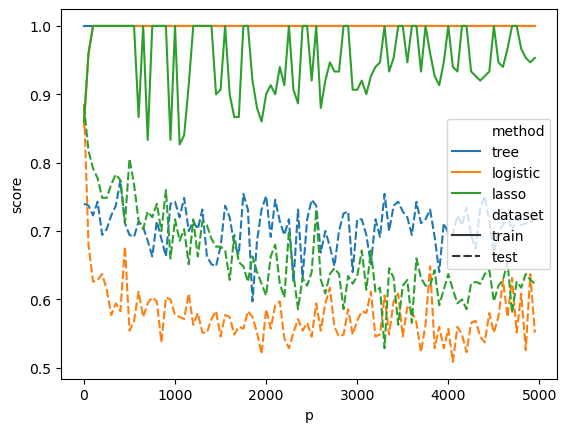

In [132]:
sns.lineplot(results,x='p',y='score',hue='method',style='dataset')

In [135]:
results.query('dataset == "test"')

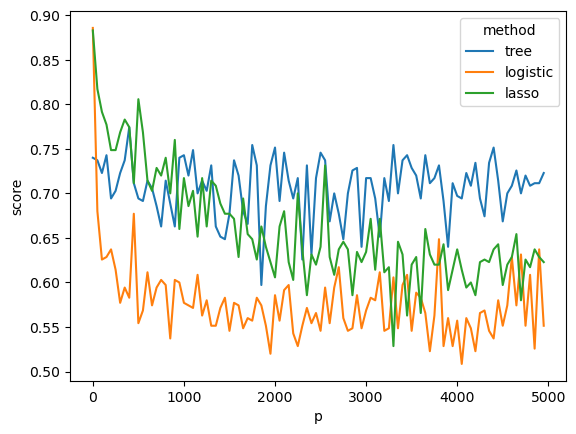

In [136]:
sns.lineplot(results.query('dataset == "test"'),x='p',y='score',hue='method')